In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
import missingno as msno
import seaborn as sns
from scipy.stats import linregress

In [2]:
# Lectura de archivos
esolmet = pd.read_csv('../data/EsolmetRuoaTo.csv',index_col=0,parse_dates=True)
una     = pd.read_csv('../data/junio_una_Ti.csv',index_col=0,parse_dates=True)
# concat
data = pd.concat([esolmet,una],axis=1)
data.dropna(inplace=True)
data

,To,TCAire,Ti_0001,Ti_001,Ti_01,Ti_003
tiempo,,,,,,
2019-06-08 00:00:00,19.81,25.348056,25.340820,24.680352,22.222786,23.750828
2019-06-08 00:10:00,19.87,25.311138,25.295892,24.634046,22.220039,23.714866
2019-06-08 00:20:00,19.89,25.274220,25.251028,24.592134,22.209779,23.682490
2019-06-08 00:30:00,19.95,25.228072,25.208714,24.557002,22.212977,23.658320
2019-06-08 00:40:00,19.95,25.187692,25.163785,24.518609,22.196678,23.625610
...,...,...,...,...,...,...
2019-06-23 23:00:00,23.97,26.680580,26.859330,26.718084,25.869269,26.458564
2019-06-23 23:10:00,23.59,26.614819,26.795609,26.659389,25.836165,26.408981
2019-06-23 23:20:00,23.39,26.729035,26.720881,26.571539,25.654018,26.296190


## Regresión lineal

In [5]:
def linear_regression(data,caso,c):
    # Para el caso Ti_ae
    Ti_s = caso
    
    fig, ax = plt.subplots(figsize=(6,6))
    
    
    x = np.linspace(-10,10,2)
    y = x 
    
    X = np.array( data.To-data.To.mean()   )
    Y = np.array( Ti_s-data.To.mean() )
    m,b,r_value, p_value,std_err = linregress(X,Y)
    
    ax.scatter(X,Y)
    ax.plot(x,y,'k-') 
    ax.plot(x,x*m+b,'r-') 
    
    
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    ax.set_box_aspect(1)
    ax.set_ylabel('Ti_s [oC]')
    ax.set_xlabel('Ti   [oC]')
    ax.set_title(f'Regresión lineal de caso c={c}kg/s')
    ax.grid()
    print(m,b,r_value)

0.6145875790276257 3.268801326591105 0.9346824023572449


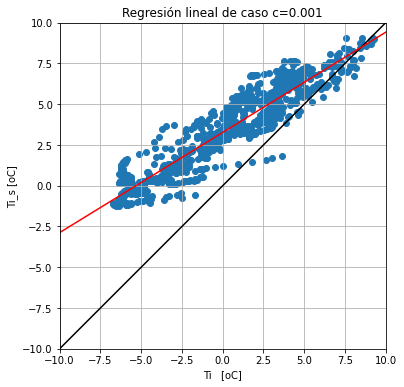

In [7]:
linear_regression(data,data.Ti_0001,'0.001')

0.6447267735119905 3.0361126553666 0.9432900053464718


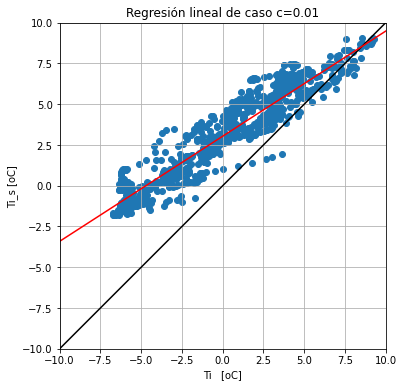

In [8]:
linear_regression(data,data.Ti_001,'0.01')

0.7771590146113889 1.9002157310599257 0.9720601327850077


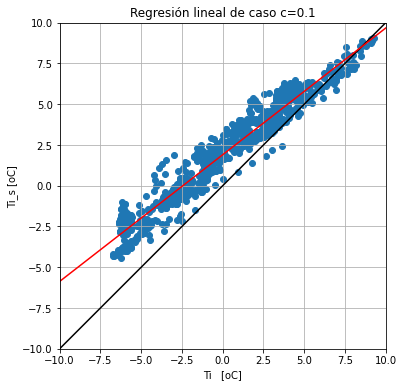

In [9]:
linear_regression(data,data.Ti_01,'0.1')

0.6932784812384772 2.647937921471546 0.9543846524752561


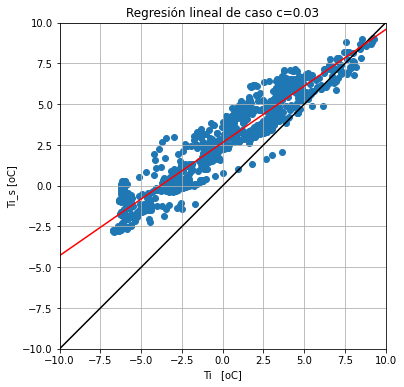

In [10]:
linear_regression(data,data.Ti_003,'0.03')

## Relación de Pearson

In [11]:
data[['Ti_0001', 'Ti_001', 'Ti_01', 'Ti_003','TCAire']].corr()

,Ti_0001,Ti_001,Ti_01,Ti_003,TCAire
Ti_0001,1.000000,0.999101,0.983379,0.995022,0.674826
Ti_001,0.999101,1.000000,0.989713,0.998292,0.674959
Ti_01,0.983379,0.989713,1.000000,0.995970,0.684646
Ti_003,0.995022,0.998292,0.995970,1.000000,0.676714
TCAire,0.674826,0.674959,0.684646,0.676714,1.000000


In [13]:
nombres = ['Ti_0001', 'Ti_001', 'Ti_01', 'Ti_003','TCAire']
for i in nombres:
    print(i,data.TCAire.corr(data[i]))

Ti_0001 0.6748260380523118
Ti_001 0.6749587569322162
Ti_01 0.6846464944578682
Ti_003 0.6767141136675063
TCAire 1.0


## dRMSE

In [14]:
for i in nombres:
    print(i,((data[i] - data.TCAire)**2).mean()**.5)

Ti_0001 2.8537586063626805
Ti_001 2.7345330257597444
Ti_01 2.4107170964537405
Ti_003 2.5750190144694467
TCAire 0.0


## Diferencia promedio de Ti

In [15]:
for i in nombres:
    print(i,(data[i]-data.TCAire).mean())

Ti_0001 2.072055590108979
Ti_001 1.839366918884474
Ti_01 0.7034699945777989
Ti_003 1.451192184989419
TCAire 0.0


## Diferencia promedio de las temperaturas máximas/mínimas diarias

In [16]:
for i in nombres:
    print(i,(data[i].resample("1D").max() - data.TCAire.resample("1D").max()).mean())

Ti_0001 3.9656950816731427
Ti_001 3.8440989302235216
Ti_01 3.2675487734424817
Ti_003 3.6490681835717584
TCAire 0.0


In [17]:
for i in nombres:
    print(i,(data[i].resample("1D").min() - data.TCAire.resample("1D").min()).mean())

Ti_0001 0.8535824899749039
Ti_001 0.3970452552400694
Ti_01 -1.66631954851388
Ti_003 -0.32612642986753154
TCAire 0.0


## Diferencia promedio del FD

In [18]:
for i in nombres:
    df_s = (data[i].resample("1D").max() - data[i].resample("1D").min()) / (data.To.resample("1D").max() - data.To.resample("1D").min())
    df_e = (data.TCAire.resample("1D").max() - data.TCAire.resample("1D").min()) / (data.To.resample("1D").max() - data.To.resample("1D").min())

    print(i,(df_s - df_e).mean())

Ti_0001 0.28240987849652693
Ti_001 0.31072782486347655
Ti_01 0.43594275109573394
Ti_003 0.35471022068687647
TCAire 0.0
